# Baseline Model prediction
---

### Initialization

In [ ]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date, time, timedelta

from sklearn.metrics import mean_squared_error,mean_absolute_error

from functions_nico.nico_preprocessing import load_data
from functions_nico.nico_models import baseline_model, print_model, split_data


In [2]:
# Load data
df = load_data("data/fueldata/wertheim_23-25.parquet")

In [3]:
df.tail()

,station_uuid,name,datetime,e5
2143092,fb0f8030-c1eb-4df1-9410-054eea7422ad,Aral Tankstelle,2025-05-25 22:40:00,1.679
2143093,fb0f8030-c1eb-4df1-9410-054eea7422ad,Aral Tankstelle,2025-05-25 22:45:00,1.679
2143094,fb0f8030-c1eb-4df1-9410-054eea7422ad,Aral Tankstelle,2025-05-25 22:50:00,1.679
2143095,fb0f8030-c1eb-4df1-9410-054eea7422ad,Aral Tankstelle,2025-05-25 22:55:00,1.679
2143096,fb0f8030-c1eb-4df1-9410-054eea7422ad,Aral Tankstelle,2025-05-25 23:00:00,1.679


### Fuel price prediction

In [ ]:
# Get predictions from baseline model by gas station

df1 = df[df["station_uuid"] == "24e5e31e-b5fd-4c1a-96aa-84de7027ee94"]
train1,test1 = split_data(df1)
predictions1 = baseline_model(train1,predictions=12*24,stepsize=(5,"minutes"),rule="daily mean")

df2 = df[df["station_uuid"] == "fb0f8030-c1eb-4df1-9410-054eea7422ad"]
train2,test2 = split_data(df2)
predictions2 = baseline_model(train2,predictions=12*24,stepsize=(5,"minutes"),rule="daily mean")

df3 = df[df["station_uuid"] == "c84fdbc6-1701-4c57-7fc0-17b2396b0041"]
train3,test3 = split_data(df3)
predictions3 = baseline_model(train3,predictions=12*24,stepsize=(5,"minutes"),rule="daily mean")

### Visualization and results

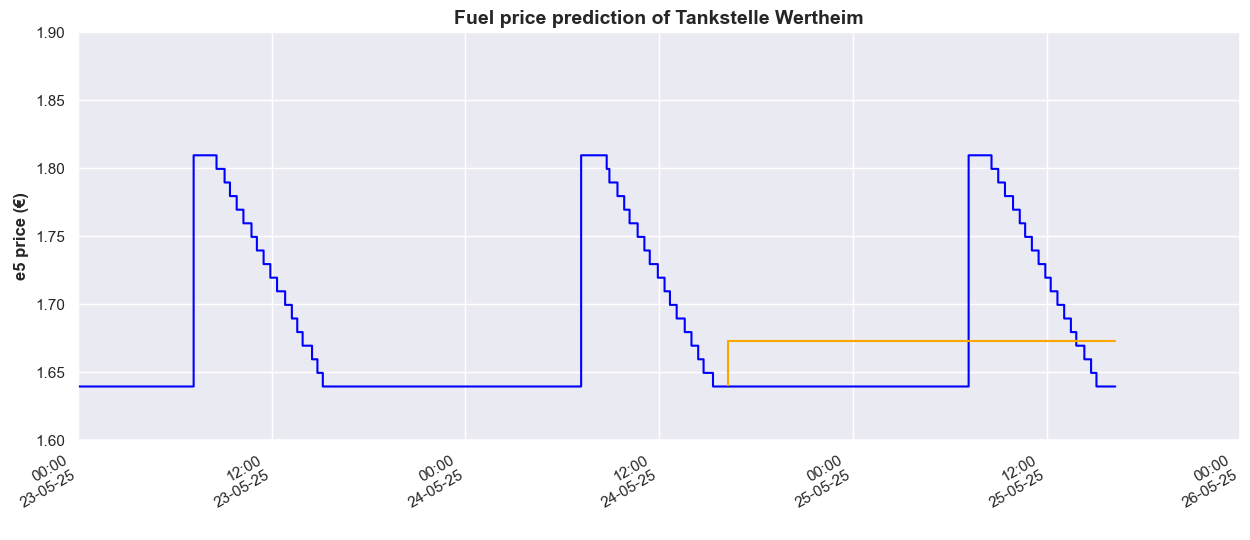

RMSE: 0.056
MAE: 0.046


In [5]:
print_model(df1,predictions1,x="datetime",y="e5",xlim=("2025-05-23","2025-05-26"),ylim=(1.6,1.9))
print("RMSE:", round(np.sqrt(mean_squared_error(test1["e5"],predictions1["e5"])),3))
print("MAE:", round(mean_absolute_error(test1["e5"],predictions1["e5"]),3))

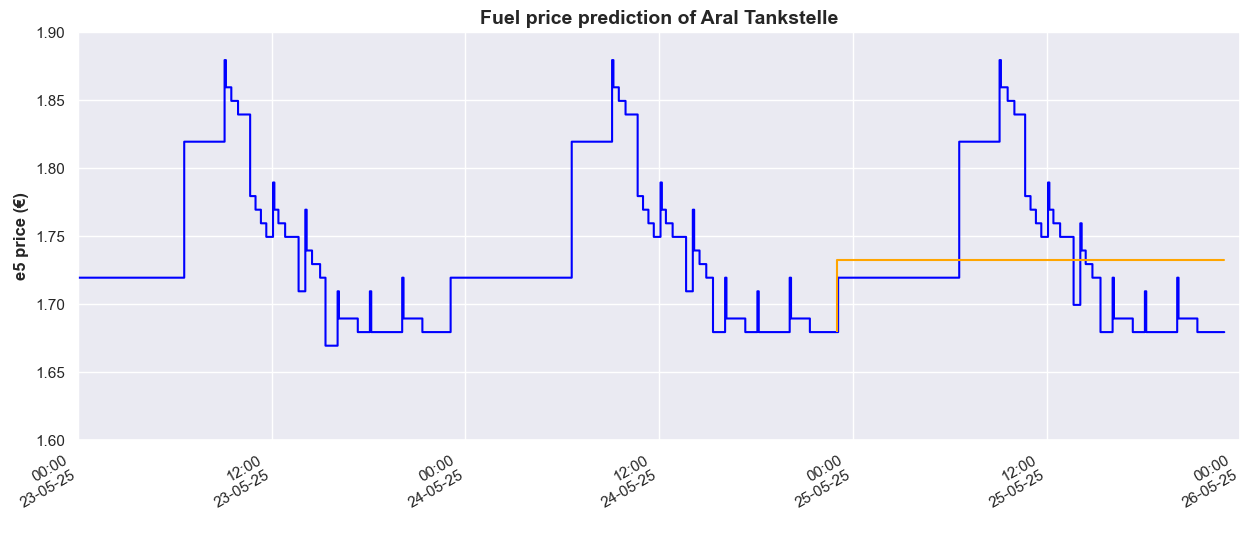

RMSE: 0.052
MAE: 0.041


In [6]:
print_model(df2,predictions2,x="datetime",y="e5",xlim=("2025-05-23","2025-05-26"),ylim=(1.6,1.9))
print("RMSE:", round(np.sqrt(mean_squared_error(test2["e5"],predictions2["e5"])),3))
print("MAE:", round(mean_absolute_error(test2["e5"],predictions2["e5"]),3))

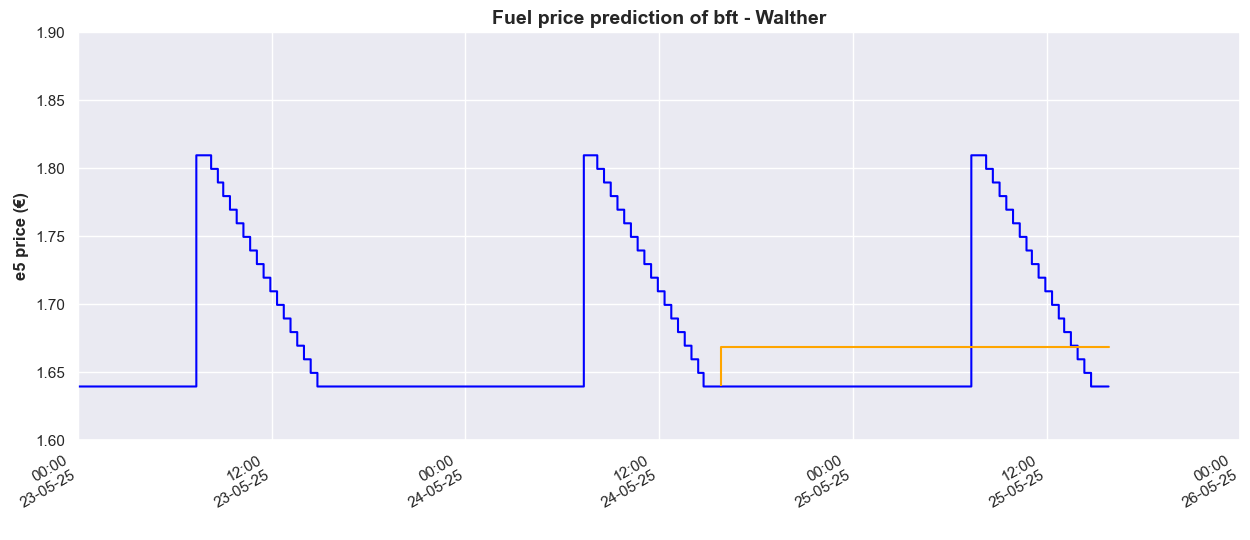

RMSE: 0.053
MAE: 0.042


In [7]:
print_model(df3,predictions3,x="datetime",y="e5",xlim=("2025-05-23","2025-05-26"),ylim=(1.6,1.9))
print("RMSE:", round(np.sqrt(mean_squared_error(test3["e5"],predictions3["e5"])),3))
print("MAE:", round(mean_absolute_error(test3["e5"],predictions3["e5"]),3))